In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset

df = pd.read_csv('https://github.com/prathyuma-08/Prediction-using-Unsupervised-ML/files/9542603/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


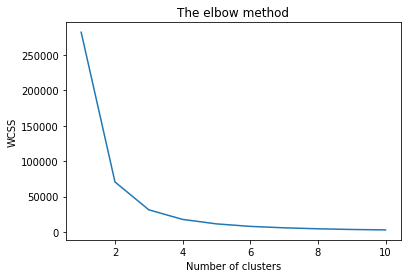

In [3]:
#Find the optimum number of clusters for k-means classification using elbow method

x = df.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From this graph, we can see the the WCSS doesn't decrease significantly after 3. So we choose the number of clusters as **3**.

In [4]:
#Creating the model for the dataset
model = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state=49)

#Fitting the model 
y = model.fit_predict(x)

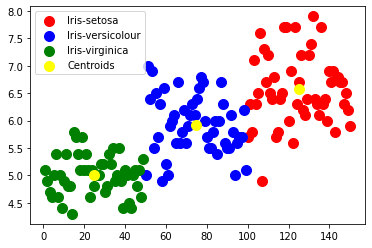

In [5]:
#Plotting the 3 clusters
plt.scatter(x[y == 0, 0], x[y == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()